The data of the file:
   subject  group gender  age  education
0        1      0      M   44       16.0
1        2      0      M   39       17.0
2        3      0      M   53       18.0
3        4      0      M   52       15.0
4        5      0      M   41       16.0
5        6      0      F   47       18.0
6        7      0      F   61       16.0
7        8      0      M   45       16.0
8        9      0      M   25       17.0
9       10      0      M   53       19.0

A little more information about the data:
           subject      group gender        age  education
count   81.000000  81.000000     81  81.000000  81.000000
unique        NaN        NaN      2        NaN        NaN
top           NaN        NaN      M        NaN        NaN
freq          NaN        NaN     67        NaN        NaN
mean    41.000000   0.604938    NaN  39.370370  14.487654
std     23.526581   0.491910    NaN  13.594525   2.267950
min      1.000000   0.000000    NaN  19.000000   9.000000
25%     21.000000  

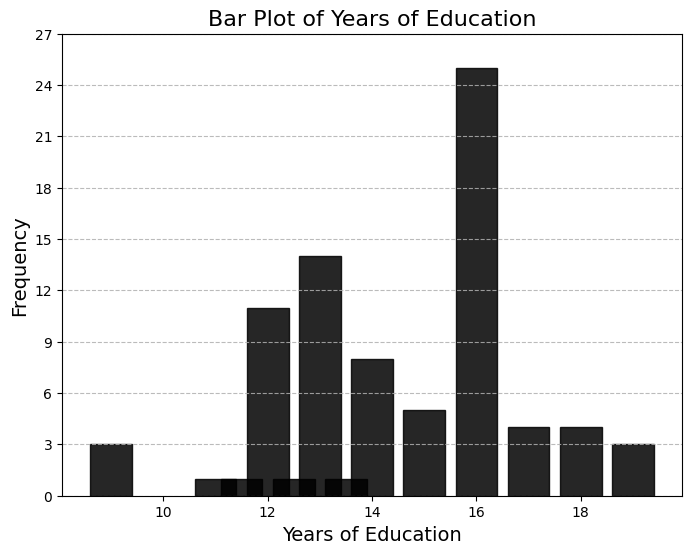

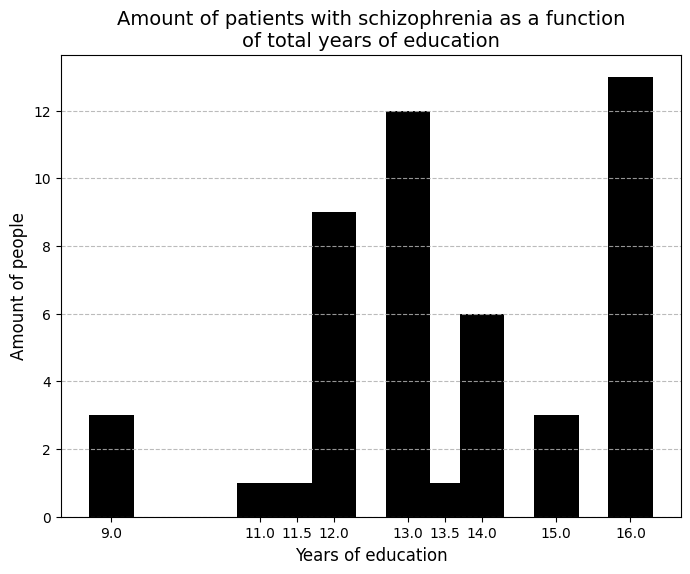

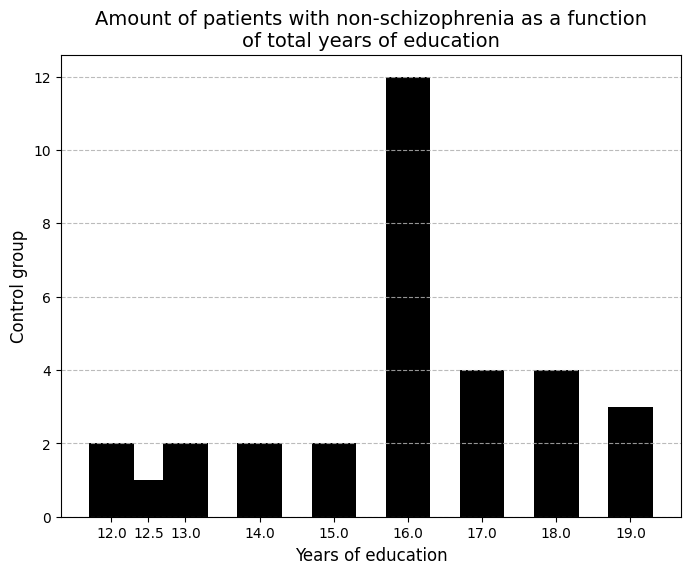

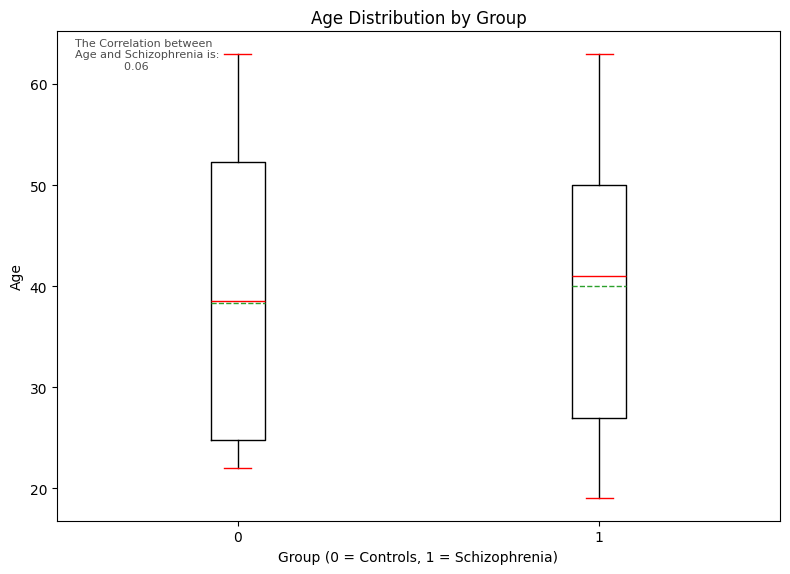

The Correlation between Age and Schizophrenia is: 0.06


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


def load_data(file):
	"""
	This function is designed to load the data from CSV file to a DataFrame object of the Pandas library.
	Also, checking that he data exist and replacing NaN values with the most common value in the same column.

	input: str [that should be a path to a file]
	output: DataFrame object or None (if an error occurred)
	"""
	try:
		data = pd.read_csv('/Users/miyaestis/Desktop/the big/demographic.csv'
                          )
		data.fillna(data.mode().iloc[0], inplace=True)
		return data
	except FileNotFoundError:
		print(f"Error: The file '{file}' was not found.")
	except pd.errors.EmptyDataError:
		print("Error: The file is empty.")
	except pd.errors.ParserError:
		print("Error: The file could not be parsed.")
	except Exception as e:
		print(f"An unexpected error occurred: {e}")

	return None

def extract_data(df: pd.DataFrame):
	"""
	This function is designed to extract some rellevant data for using latly.
	Rethar then loading every time the whole DataFrame, we will use the slices of data we need.
	Also, checking that he data exist and handaling errors.

	input: DataFrame object
	output: (PandaSeries object, DataFrame object, DataFrame object) or None (if an error occurred)
	"""
	if not isinstance(df, pd.DataFrame):
		raise TypeError("Expected a pandas DataFrame.")
	else:
		try:
			education_counts = df['education'].value_counts().sort_index()
			filtered_df_by_1 = df[df["group"] == 1]
			filtered_df_by_0 = df[df["group"] == 0]
		except Exception as e:
			print(f"An error occurred while filtering the data: {e}")
			return None
	
	return education_counts, filtered_df_by_1, filtered_df_by_0

def bar_plot_of_education(education_counts: pd.Series):
	"""
	This function is designed to show relevant graph from the DataFrame's data.
	checking if the relevant data exists.
	[this happend inside a try-excpet block to monitoring the operations and avoiding serious errors].

	input: DataFrame object
	output: showing the graph or None (if an error occurred)
	"""
	if not isinstance(education_counts, pd.Series):
		raise TypeError("Expected a pandas Series.")
	else:
		if not education_counts.empty:
			y_ticks = np.arange(0, education_counts.values.max() + 3, 3) 			#for y-axis value representation
		else:
			print("Warning: No education data available for plotting.")
			return None

	plt.figure(figsize=(8, 6))
	plt.bar(education_counts.index, education_counts.values, color='black', alpha=0.85, edgecolor='black')
	plt.title("Bar Plot of Years of Education", fontsize=16)
	plt.xlabel("Years of Education", fontsize=14)
	plt.ylabel("Frequency", fontsize=14)
	plt.grid(axis="y", linestyle="--", alpha=0.85)
	plt.yticks(y_ticks)
	plt.show()


def plt_schizophrenia_vs_education(filtered_df_by_1: pd.DataFrame):
	"""
	This function is designed to show relevant graph from the DataFrame's data.
	checking if the relevant data exists.
	[this happend inside a try-excpet block to monitoring the operations and avoiding serious errors].

	input: DataFrame object
	output: showing the graph or None (if an error occurred)
	"""
	if not (isinstance(filtered_df_by_1, pd.DataFrame)):
		raise TypeError("Expected a pandas DataFrame.")
	else:
		if not filtered_df_by_1.empty:
			education_counts = filtered_df_by_1["education"].value_counts().sort_index()
		else:
			print("Warning: No filtered data available for plotting.")
			return None

	plt.figure(figsize=(8, 6))
	plt.bar(education_counts.index, education_counts.values, width=0.6, color='black')
	plt.xlabel("Years of education", fontsize=12)
	plt.ylabel("Amount of people", fontsize=12)
	plt.title("Amount of patients with schizophrenia as a function\nof total years of education", fontsize=14)
	plt.grid(axis="y", linestyle="--", alpha=0.85)
	plt.xticks(education_counts.index, fontsize=10)
	plt.show()

def plt_non_schizophrenia_vs_education(filtered_df_by_0: pd.DataFrame):
	"""
	This function is designed to show relevant graph from the DataFrame's data.
	checking if the relevant data exists.
	[this happend inside a try-excpet block to monitoring the operations and avoiding serious errors].

	input: DataFrame object
	output: showing the graph or None (if an error occurred)
	"""
	if not (isinstance(filtered_df_by_0, pd.DataFrame)):
		raise TypeError("Expected a pandas DataFrame.")
	else:
		if not filtered_df_by_0.empty:	
			education_counts = filtered_df_by_0["education"].value_counts().sort_index()
		else:
			print("Warning: No filtered data available for plotting.")
			return None

	plt.figure(figsize=(8, 6))
	plt.bar(education_counts.index, education_counts.values, width=0.6, color='black')
	plt.xlabel("Years of education", fontsize=12)
	plt.ylabel("Control group", fontsize=12)
	plt.title("Amount of patients with non-schizophrenia as a function\nof total years of education", fontsize=14)
	plt.grid(axis="y", linestyle="--", alpha=0.85)
	plt.xticks(education_counts.index, fontsize=10)
	plt.show()

def plt_corr_between_groups(df: pd.DataFrame):
	"""
	This function is designed to show relevant graph from the DataFrame's data.
	checking if the relevant data exists.
	[this happend inside a try-excpet block to monitoring the operations and avoiding serious errors].

	input: DataFrame object
	output: (showing the graph + printing the value of correlation) or None (if an error occurred)
	"""
	if not isinstance(df, pd.DataFrame):
		raise TypeError("Expected a pandas DataFrame.")
	else:
		try:
			correlation = df['age'].corr(df['group'])
		except Exception as e:
			print(f"An error occurred while filtering the data: {e}")
			return None
	
	#using subplot for managing the fig-size, text and boxplot together: 
	fig, ax = plt.subplots(figsize=(8, 6))
	df.boxplot(column='age', by='group', ax= ax, grid=False, showmeans=True, meanline=True,  boxprops=dict(color='black'),
			whiskerprops=dict(color='black'),
			capprops=dict(color='red'),
			medianprops=dict(color='red'))
	text = f"The Correlation between\nAge and Schizophrenia is:\n\t\t{correlation:.2f}"
	fig.text(0.10, 0.85, text.replace("\t", "       "), fontsize=8, alpha= 0.7, color="black")
	ax.set_title("Age Distribution by Group")  
	plt.suptitle("")
	ax.set_xlabel("Group (0 = Controls, 1 = Schizophrenia)")
	ax.set_ylabel("Age")
	fig.tight_layout()
	plt.show()
	#printing out the value of the correlation:
	print(f"The Correlation between Age and Schizophrenia is: {correlation:.2f}")


if __name__ == "__main__":
	file_path = "REQUESTED FILE PATH" 		#fill in your path to demographic.csv file
	df = load_data(file_path)					
	if df is not None:	
		if df.empty:
			print("Error: DataFrame is empty.")	
		else:
			try:
				#showing some info of the DataFrame:
				print(f"The data of the file:\n{df.head(10)}\n")									
				print("A little more information about the data:\n", df.describe(include='all'))
				
				#using the functions of represanting the graph of info:
				education_counts, filtered_df_by_1, filtered_df_by_0 = extract_data(df)
				bar_plot_of_education(education_counts)
				plt_schizophrenia_vs_education(filtered_df_by_1)
				plt_non_schizophrenia_vs_education(filtered_df_by_0)
				plt_corr_between_groups(df)
			except Exception as e:
				print(f"Unexpected error: {e}")
	else:
		print(f"An error occurred with loading the file: {file_path}")
else:
	pass

